In [1]:
import pandas as pd
import numpy as np
import glob
import os
import datetime
import matplotlib.pyplot as plt
import requests
import finvizfinance 
import finvizfinance.screener 
from finvizfinance.quote import finvizfinance
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/draganbogatic/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Input tickers you want to obtain news for
stock_list = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/finviz-stock-screen/resources/stock_list.csv')
stock_list = stock_list.drop(columns=['Unnamed: 0'])
stock_list.head()

,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,AMAT,"Applied Materials, Inc.",Technology,Semiconductor Equipment & Materials,USA,1.233400e+11,31.99,133.73,-0.0051,7615112.0
1,BIO,"Bio-Rad Laboratories, Inc.",Healthcare,Medical Devices,USA,1.853000e+10,4.96,626.12,0.0021,138223.0
2,DECK,Deckers Outdoor Corporation,Consumer Cyclical,Footwear & Accessories,USA,9.560000e+09,26.34,341.06,0.0045,147715.0
3,FB,"Facebook, Inc.",Communication Services,Internet Content & Information,USA,8.747300e+11,30.36,306.18,-0.0053,12815056.0
4,GNSS,Genasys Inc.,Technology,Scientific & Technical Instruments,USA,2.408900e+08,23.56,7.21,0.0070,75046.0


In [125]:
#tickers = stock_list['Ticker']
tickers = ['NIO','AYRO','SOLO','CBAT','LAC','TSLA','APHA','TLRY','SNDL']

In [136]:
# Loop through tickers to print separate csv news files
for ticker in tickers:
    stock = finvizfinance(ticker)
    news = stock.TickerNews()
    news["Ticker"] = ticker
    news.to_csv(f'/Users/draganbogatic/Documents/Fin_Tech/finviz-stock-screen/resources/sentiment/{ticker}.csv')

In [137]:
# Set the directory path where csv files are stored
os.chdir('/Users/draganbogatic/Documents/Fin_Tech/finviz-stock-screen/resources/sentiment')
extension = 'csv'

In [178]:
# Read in all csv files
combined = [i for i in glob.glob('*.{}'.format(extension))]
combined

['TLRY.csv',
 'SNDL.csv',
 'AYRO.csv',
 'NIO.csv',
 'TSLA.csv',
 'CBAT.csv',
 'APHA.csv',
 'SOLO.csv',
 'LAC.csv']

In [179]:
# Concat csv files
combined = pd.concat([pd.read_csv(f) for f in combined])
combined_df = pd.DataFrame(combined)
combined_df = combined_df.drop(['Unnamed: 0'], axis=1)
combined_df = combined_df.reset_index()
combined_df = combined_df.drop(['index'], axis=1)
combined_df = combined_df.drop_duplicates('Title')

combined_df.to_csv('/Users/draganbogatic/Documents/Fin_Tech/finviz-stock-screen/resources/combined.csv')

In [180]:
# Apply vader sentiment analyzer to news to obtain sentiment scores
vader = SentimentIntensityAnalyzer()

for row in combined_df['Title']:
    scores = combined_df['Title'].apply(vader.polarity_scores).tolist()
    scores = pd.DataFrame(scores)
 
scores

,neg,neu,pos,compound
0,0.310,0.690,0.000,-0.2023
1,0.000,1.000,0.000,0.0000
2,0.000,1.000,0.000,0.0000
3,0.000,0.857,0.143,0.3612
4,0.351,0.649,0.000,-0.4019
...,...,...,...,...
697,0.000,0.706,0.294,0.6124
698,0.000,1.000,0.000,0.0000
699,0.000,0.571,0.429,0.5423
700,0.000,0.840,0.160,0.2732


In [181]:
# Concat news and sentiment scores into one dataframe
combined_sentiment = pd.concat([combined_df, scores], join='inner',axis=1)
combined_sentiment.to_csv('/Users/draganbogatic/Documents/Fin_Tech/finviz-stock-screen/resources/combined_sentiment.csv')

In [182]:
# Obtain sentiment by ticker
sentiment_by_ticker = combined_sentiment.groupby(['Ticker']).mean()
sentiment_by_ticker

,neg,neu,pos,compound
Ticker,,,,
APHA,0.009795,0.931590,0.058590,0.080131
AYRO,0.015814,0.910163,0.074023,0.086642
CBAT,0.050780,0.790644,0.158610,0.186236
NIO,0.051816,0.883143,0.065051,0.022219
SNDL,0.066290,0.839806,0.093914,0.051494
SOLO,0.017687,0.897735,0.084578,0.105012
TLRY,0.051688,0.845458,0.102854,0.100602
TSLA,0.086538,0.788011,0.125484,0.051953


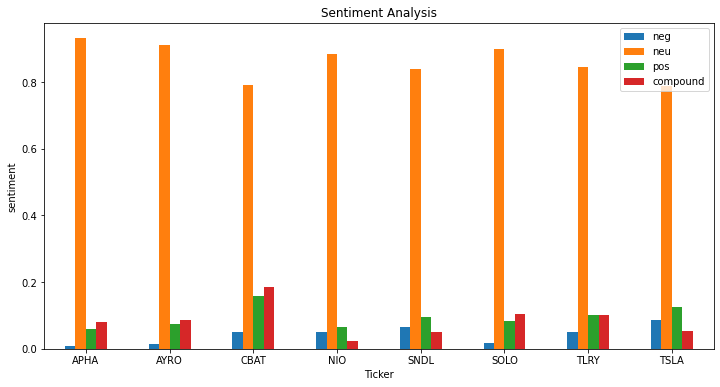

In [183]:
# Plot sentiment
sentiment_by_ticker.plot.bar(figsize=(12,6),title='Sentiment Analysis',ylabel='sentiment', rot=0)
plt.savefig('/Users/draganbogatic/Documents/Fin_Tech/finviz-stock-screen/resources/sentiment/combined_sentiment.pdf')